# Machine learning-based prediction of COVID-19 diagnosis based on symptoms

## Abstract:

>  The early detection of COVID-19 by the use of an efficient SARS-CoV-2 screening test would undoubtedly minimise the burden on healthcare systems and prevents the spread of the disease.Prediction models were built to measure the chance of infection based on the different parameters collected as a part of the screening test.These are intended to assist medical practitioners all around the world in treating patients.Different feature engineering and feature selection techniques were performed in order to enhance the performance of the machine learning techniques. These machine learning techniques were compared based on the different performance measures and a superior model is suggested for prediction. 



## Introduction:

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. 

## Dataset:
The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Data from 11th March to 15th April was used for training and validation and the data from 16th April to 30th April was used as  test set.Training and validation set are in a ratio of 4:1.  



## Variables in the dataset:

A. Basic information: 

1. ID (Individual ID) 

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)

<br>


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 


<br>

C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).


<br>

D. Covid report

11. Corona positive or negative


In [23]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To read the csv file
covid = pd.read_csv("/content/corona_tested_006.csv")

<ipython-input-23-292bb92f5e3c>:9: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  covid = pd.read_csv("/content/corona_tested_006.csv")


#### Basic exploration of the dataset.

In [24]:
covid.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


Data Types:

Numerical data - ( Individual id )

Categorical data - Nominal ( Cough_symptoms, Fever, Sore_throat,  Shortness_of_breath, Headache, Corona, Age_60_above, Sex, Known_contact)

In [25]:
# To know basic information
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [26]:
# Converting the data types 
covid["Test_date"] = pd.to_datetime(covid['Test_date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime

##### Checking Unique values in all columns.

In [27]:
# Examinig the unique values in the dataset
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [28]:
covid['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

Observation : Same values are given as uppercase and some are in title case.

In [29]:
# Converting all the categorical values to title case 
covid.iloc[:,2:] = covid.iloc[:,2:].apply(lambda x: x.astype(str).str.title() ) 

In [30]:
# Replacing the values specified as none with np.nan
covid= covid.replace("^None$", np.nan, regex= True)

In [31]:
# Examinig the unique values in the dataset
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [32]:
# Examining unique values
covid['Corona'].unique()

array(['Negative', 'Positive', 'Other'], dtype=object)

Removing the rows where target variable(Corona) is Other.

In [33]:
index_names = covid[covid['Corona'] == 'Other'].index  
# drop these given row with indexes from dataFrame
covid.drop(index_names, inplace = True)

In [34]:
covid.nunique()

Ind_ID                 274956
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      2
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

##### Dealing with null values in the dataset.

In [35]:
# To see the no. of null values in all the columns
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           125664
Sex                     19045
Known_contact               0
dtype: int64

<Axes: >

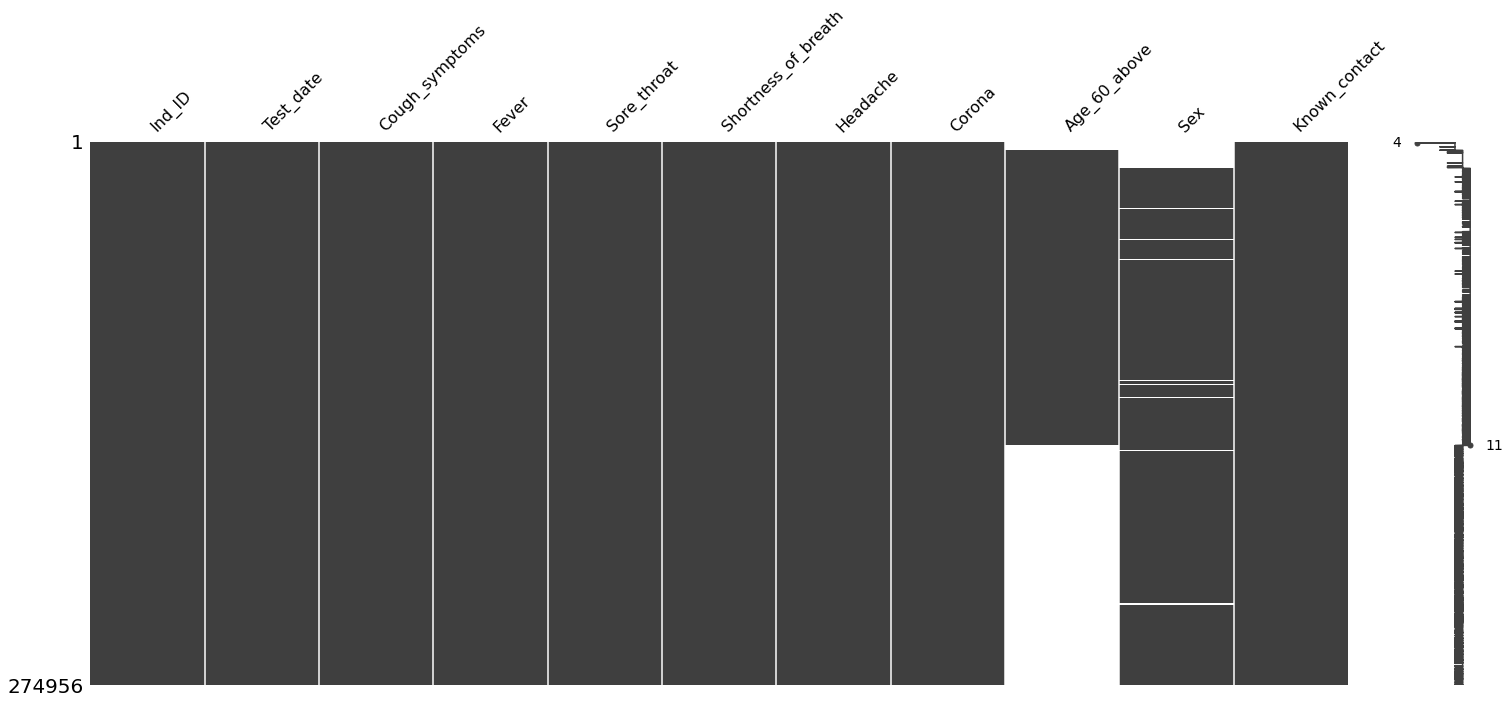

In [36]:
import missingno as mn
mn.matrix(covid)

In [37]:
# Checking the percentage of null values in all columns
covid.isnull().mean()*100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.091651
Fever                   0.091651
Sore_throat             0.000364
Shortness_of_breath     0.000364
Headache                0.000364
Corona                  0.000000
Age_60_above           45.703313
Sex                     6.926563
Known_contact           0.000000
dtype: float64

The column Age_60_above is having 45 percent null values. The remainig columns are having very low percentage of null values, so rows corresponding to these columns were dropped.

###### Creating new dataframe covid_1 containing null values in only Age_60_above column.

In [38]:
covid_1 = covid.dropna(subset= ["Cough_symptoms", "Fever", "Sore_throat",
                                "Shortness_of_breath", "Headache", "Sex"], axis= 0)

###### Imputation of null values

In [ ]:
# Creating new dataframe 
covid_Impu = covid_1.copy(deep = True)

In [ ]:
# Mapping the values before imputation
covid_Impu['Cough_symptoms'] = covid_Impu['Cough_symptoms'].map( { 'True' : 1, 'False': 0})
covid_Impu['Fever'] = covid_Impu['Fever'].map( { 'True' : 1, 'False': 0})
covid_Impu['Sore_throat'] = covid_Impu['Sore_throat'].map( { 'True' : 1, 'False': 0})
covid_Impu['Shortness_of_breath'] = covid_Impu['Shortness_of_breath'].map( { 'True' : 1, 'False': 0})
covid_Impu['Headache'] = covid_Impu['Headache'].map( { 'True' : 1, 'False': 0})
covid_Impu['Age_60_above'] = covid_Impu['Age_60_above'].map( { 'Yes' : 1, 'No': 0})
covid_Impu['Sex'] = covid_Impu['Sex'].map( { 'Male' : 1, 'Female': 0})
covid_Impu['Known_contact'] = covid_Impu['Known_contact'].map( { 'Contact_with_confirmed' : 1, 
                                                      'Abroad': 2,
                                                       'Other': 3 })

In [ ]:
# Dropping the target variable before imputation
covid_Impu.drop(['Test_date' ,'Corona'], axis=1, inplace= True)

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 15.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=09e989867cee92bfb3841349e9b142b4e1ea4379d365cfa5be415e648814be07
  Stored in directory: /root/.cache/pip/wheels/45/e1/7c/5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=b0b2cb537f453f97c57bda09ea16fd7cd7a61c30c97d8c38cfbdd95a89b866ee
  Stored in directory: /root/.cache/pip/wheels/5f/e9/7a/9969b4e11eb626b45f12a46849b8c65aa718244a243583caf1
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer, SoftImpute
MICE = IterativeImputer()

covid_Impu_MICE = covid_Impu.iloc[:,:].copy(deep=True)
covid_Impu_MICE.iloc[:, :] = MICE.fit_transform(covid_Impu_MICE)

covid_Impu_si = covid_Impu.iloc[:,:].copy(deep=True)
covid_Impu_si.iloc[:, :] = SoftImpute().fit_transform(covid_Impu_si)

[SoftImpute] Max Singular Value of X_init = 83687982.831362
[SoftImpute] Iter 1: observed MAE=345.553133 rank=1
[SoftImpute] Iter 2: observed MAE=345.554297 rank=1
[SoftImpute] Iter 3: observed MAE=345.554971 rank=1
[SoftImpute] Iter 4: observed MAE=345.555509 rank=1
[SoftImpute] Iter 5: observed MAE=345.555945 rank=1
[SoftImpute] Iter 6: observed MAE=345.556299 rank=1
[SoftImpute] Iter 7: observed MAE=345.556587 rank=1
[SoftImpute] Iter 8: observed MAE=345.556820 rank=1
[SoftImpute] Iter 9: observed MAE=345.557009 rank=1
[SoftImpute] Iter 10: observed MAE=345.557163 rank=1
[SoftImpute] Iter 11: observed MAE=345.557287 rank=1
[SoftImpute] Iter 12: observed MAE=345.557388 rank=1
[SoftImpute] Iter 13: observed MAE=345.557470 rank=1
[SoftImpute] Iter 14: observed MAE=345.557537 rank=1
[SoftImpute] Iter 15: observed MAE=345.557591 rank=1
[SoftImpute] Iter 16: observed MAE=345.557635 rank=1
[SoftImpute] Iter 17: observed MAE=345.557670 rank=1
[SoftImpute] Iter 18: observed MAE=345.557699 ra

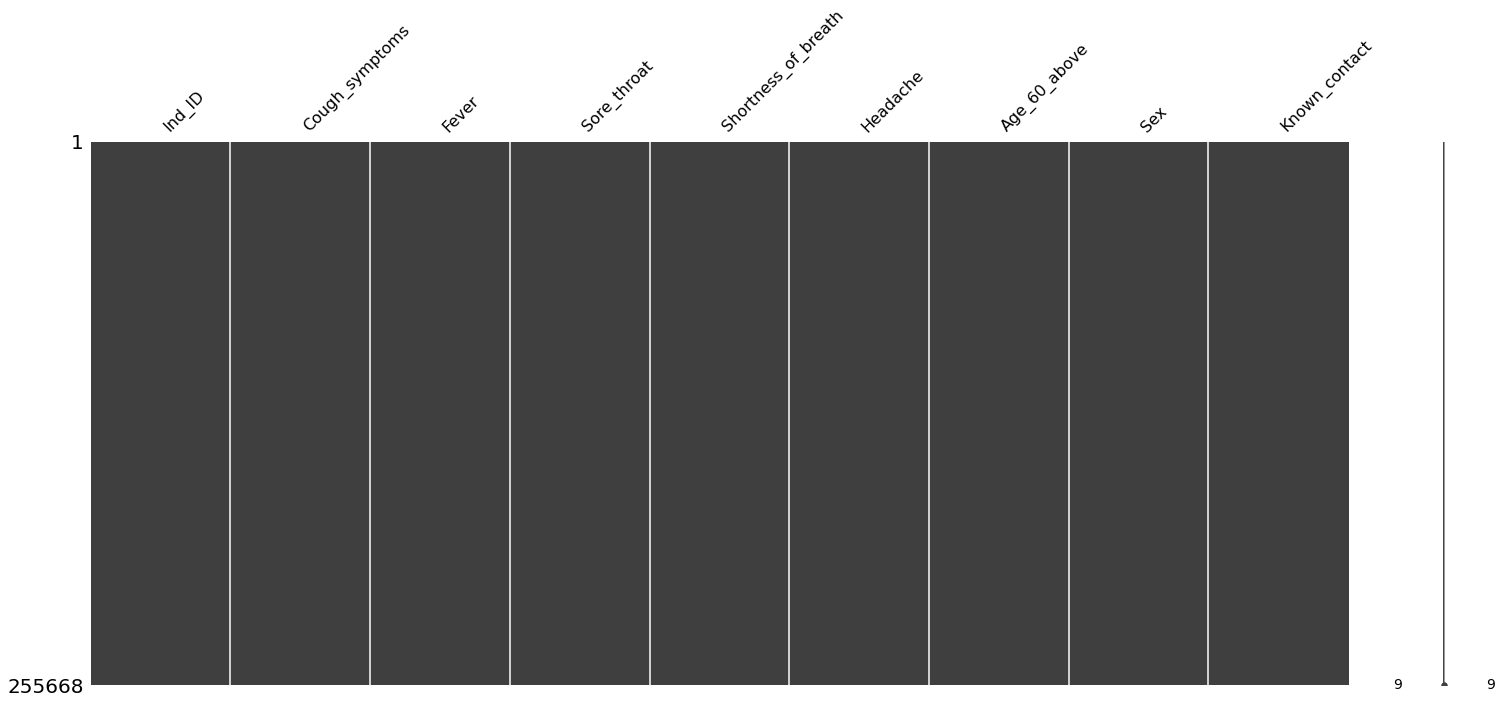

In [ ]:
import missingno as mn
mn.matrix(covid_Impu_si)

In [ ]:
# round the values
a = round(covid_Impu_MICE['Age_60_above'])
b = round(covid_Impu_MICE['Age_60_above'])
# Map them to categories
Age_imputed_mice = a.map( { 1 : 'Yes' , 0 : 'No' } )
Age_imputed_si = b.map( { 1 : 'Yes' , 0 : 'No' } )

In [ ]:
print(covid_1['Age_60_above'].value_counts()) # without imputation
print(Age_imputed_mice.value_counts()) # MICE imputation
print(Age_imputed_si.value_counts())  # SoftImpute

No     112593
Yes     23701
Name: Age_60_above, dtype: int64
No     231967
Yes     23701
Name: Age_60_above, dtype: int64
No     231967
Yes     23701
Name: Age_60_above, dtype: int64


**Imputation resulted in only increase in 'No' value for Age_60_above. Hence it's dropped.**


In [39]:
covid_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255668 entries, 13727 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               255668 non-null  int64         
 1   Test_date            255668 non-null  datetime64[ns]
 2   Cough_symptoms       255668 non-null  object        
 3   Fever                255668 non-null  object        
 4   Sore_throat          255668 non-null  object        
 5   Shortness_of_breath  255668 non-null  object        
 6   Headache             255668 non-null  object        
 7   Corona               255668 non-null  object        
 8   Age_60_above         136294 non-null  object        
 9   Sex                  255668 non-null  object        
 10  Known_contact        255668 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [ ]:
# Exporting the data to perform SQL queries before dropping the age column.
#covid_1.loc[:,'Age_60_above'] = Age_imputed_mice
#covid_1.to_csv('Covid_data__for_sql.csv') 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [40]:
# Changing the index to the individual id
covid_1.set_index(covid_1['Ind_ID'], inplace = True )
# Dropping the columns
covid_1.drop(['Ind_ID', 'Age_60_above'], axis= 1, inplace= True )       # 'Age_60_above'

<ipython-input-40-44e58910b333>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_1.drop(['Ind_ID', 'Age_60_above'], axis= 1, inplace= True )       # 'Age_60_above'


In [41]:
covid_1.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
Known_contact          0
dtype: int64


#### Examinig the distribution of all columns

In [68]:
covid_1.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Sex', 'Known_contact'],
      dtype='object')

<ipython-input-73-aa1e57ef1fbf>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


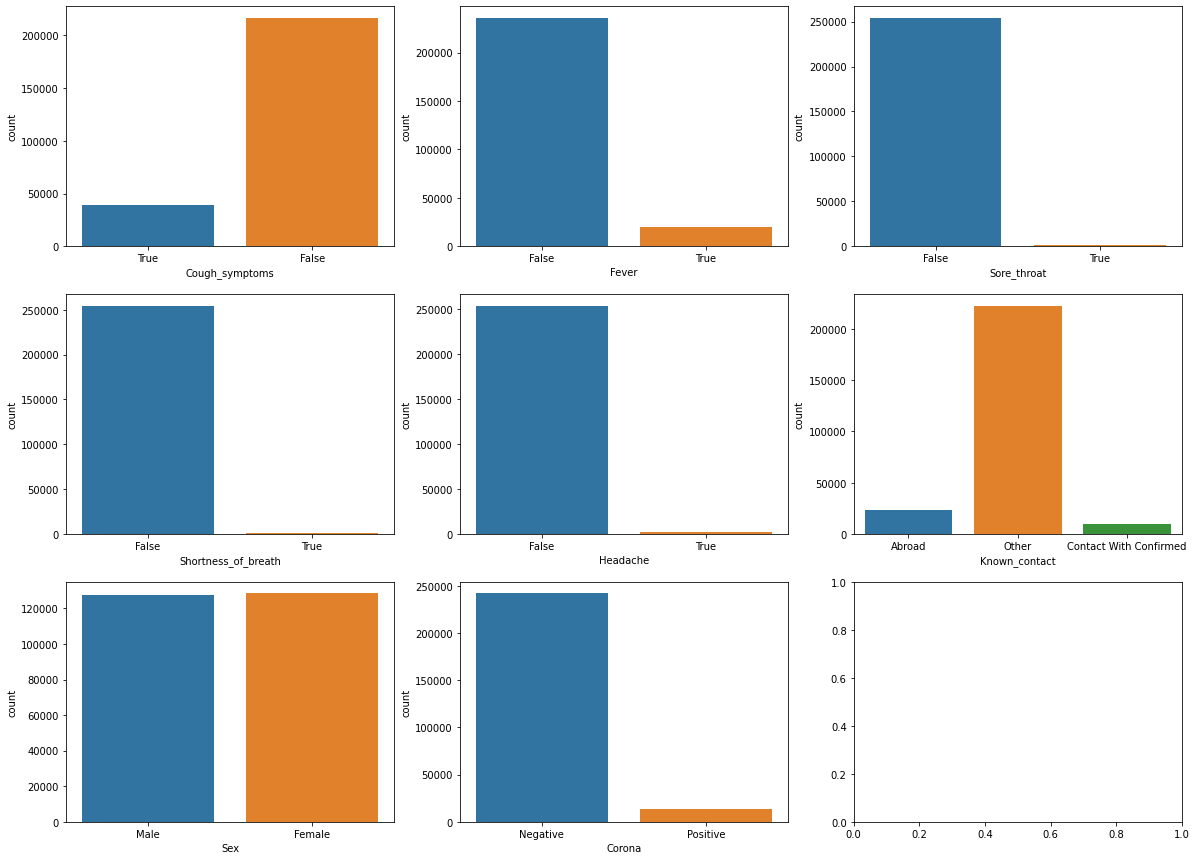

In [73]:
# Examining the distribution of all variables
plt.figure(figsize = (20, 15))

sns.countplot(x= covid_1['Cough_symptoms'])
plt.subplot(3,3,1)

sns.countplot(x= covid_1['Cough_symptoms'])
plt.subplot(3,3,2)

sns.countplot(x= covid_1['Fever'])
plt.subplot(3,3,3)

sns.countplot(x= covid_1['Sore_throat'])
plt.subplot(3,3,4)

sns.countplot(x= covid_1['Shortness_of_breath'])
plt.subplot(3,3,5)

sns.countplot(x= covid_1['Headache'])
plt.subplot(3,3,6)

sns.countplot(x= covid_1['Known_contact'])
plt.subplot(3,3,7)

sns.countplot(x= covid_1['Sex'])
plt.subplot(3,3,8)

sns.countplot(x= covid_1['Corona'])
plt.subplot(3,3,9)

plt.show()

**Obs:** Unbalanced dataset, as the **target varaible Corona** doesn't have equal number of instances for it's 2 values. 

### EDA

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


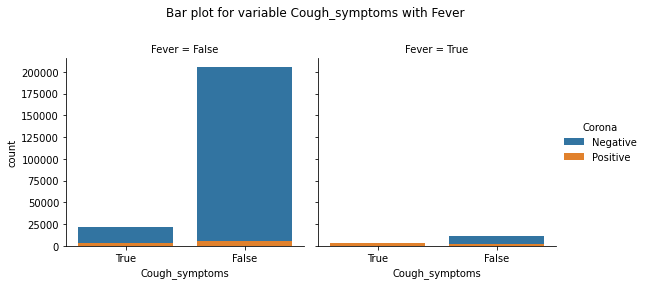

In [74]:
# Creating the facetgrid. 
graph = sns.FacetGrid(covid_1, col= 'Fever', hue= 'Corona', height= 4, aspect= 1)
# Mapping the attributes with facetgrid
graph.map(sns.countplot,'Cough_symptoms').add_legend()
# Adding title
graph.fig.suptitle('Bar plot for variable Cough_symptoms with Fever')
graph.fig.subplots_adjust(top= 0.8)

**Obs:** People with fever and cough are more likely found to be covid positive.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


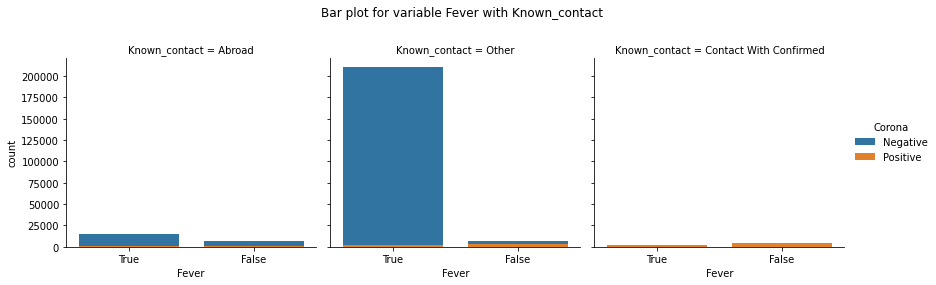

In [75]:
# Creating the facetgrid. 
graph = sns.FacetGrid(covid_1, col= 'Known_contact', hue= 'Corona', height= 4, aspect= 1)
# Mapping the attributes with facetgrid
graph.map(sns.countplot,'Fever').add_legend()
# Adding title
graph.fig.suptitle('Bar plot for variable Fever with Known_contact')
graph.fig.subplots_adjust(top= 0.8)

**Obs:** Irrespective of the fever condition, if a person is having a contact with an infected person then he is more likely to be found positive in the test

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


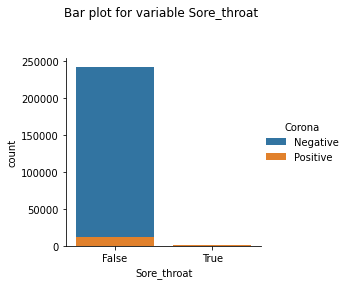

In [77]:
# Creating the facetgrid. 
graph = sns.FacetGrid(covid_1 , hue= 'Corona', height= 4, aspect= 1)
# Mapping the attributes with facetgrid
graph.map(sns.countplot,'Sore_throat').add_legend()
# Adding title
graph.fig.suptitle('Bar plot for variable Sore_throat')
graph.fig.subplots_adjust(top= 0.8)

In [78]:
# Examining the count 
pd.crosstab(covid_1['Corona'], covid_1['Sore_throat'])

Sore_throat,False,True
Corona,,
Negative,241999,137
Positive,12173,1359


**Obs:** If a person is found to have sore throat then there's chance to be found covid positive. But in the given dataset, very few cases with Sore_throat = True were found.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


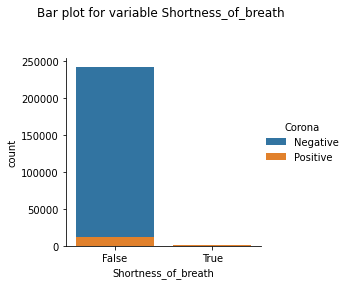

In [79]:
# Creating the facetgrid. 
graph = sns.FacetGrid(covid_1 , hue= 'Corona', height= 4, aspect= 1)
# Mapping the attributes with facetgrid
graph.map(sns.countplot,'Shortness_of_breath').add_legend()
# Adding title
graph.fig.suptitle('Bar plot for variable Shortness_of_breath')
graph.fig.subplots_adjust(top= 0.8)

In [80]:
# Examining the count 
pd.crosstab(covid_1['Corona'], covid_1['Shortness_of_breath'])

Shortness_of_breath,False,True
Corona,,
Negative,242037,99
Positive,12553,979


**Obs:** If a person experiences shortness of breath then there's a chance to be found covid positive. But in the given dataset, very few cases with Shortness_of_breath = True were found.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


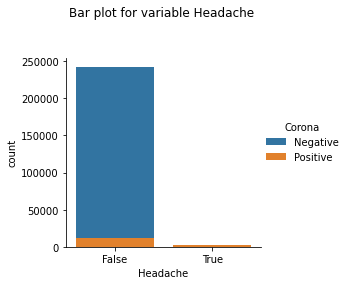

In [81]:
# Creating the facetgrid. 
graph = sns.FacetGrid(covid_1 , hue= 'Corona', height= 4, aspect= 1)
# Mapping the attributes with facetgrid
graph.map(sns.countplot,'Headache').add_legend()
# Adding title
graph.fig.suptitle('Bar plot for variable Headache')
graph.fig.subplots_adjust(top= 0.8)

In [82]:
# Examining the count 
pd.crosstab(covid_1['Corona'], covid_1['Headache'])

Headache,False,True
Corona,,
Negative,242038,98
Positive,11527,2005


**Obs:** Suffering with Headache is also an important parameter to find the covid positive patients. 

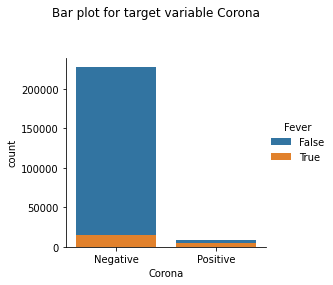

In [83]:
# Creating the facetgrid. 
graph = sns.FacetGrid(covid_1 , hue= 'Fever', height= 4, aspect= 1)
# Mapping the attributes with facetgrid
graph.map(sns.countplot,'Corona', order= ['Negative', 'Positive']).add_legend()
# Adding title
graph.fig.suptitle('Bar plot for target variable Corona')
graph.fig.subplots_adjust(top= 0.8)

In [84]:
# Examining the count 
pd.crosstab(covid_1['Corona'], covid_1['Fever'])

Fever,False,True
Corona,,
Negative,227322,14814
Positive,8492,5040


##### EDA Conclusion:
1) The dataset is an unbalanced dataset with few cases as positive for target variable(Corona).

2) If a person is in contact with an infected person, then there is more chance of found to be positive in the test.

3) Cough_symptoms, fever, Headache are found to be more prevalent in covid positive people.
 
4) People with symptoms like sore throat, shortness of breath have higher chances of found to be covid positive.

5) People with fever, cough along with other symptoms are more likely to be found positive.

### Splitting the data based on the dates.

In [85]:
# splitting the data to train and test set based on date.
#greater than the start date and smaller than the end date

# Considering data from march 11 to april 15 as training set.
mask1 = (covid_1['Test_date'] >= '2020-3-11') & (covid_1['Test_date'] <= '2020-4-15')
covid_train = covid_1.loc[mask1]

# Considering data from april 16 to april 30 as test set
mask2 = (covid_1['Test_date'] >= '2020-4-16') & (covid_1['Test_date'] <= '2020-4-30')
covid_test = covid_1.loc[mask2]

In [86]:
# dropping the date column 
covid_train.drop('Test_date', axis= 1, inplace= True)
covid_test.drop('Test_date', axis= 1, inplace= True)

<ipython-input-86-e2777dfc6e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_train.drop('Test_date', axis= 1, inplace= True)
<ipython-input-86-e2777dfc6e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_test.drop('Test_date', axis= 1, inplace= True)


### Feature Encoding

In [87]:
# Encoding the categorical variables 
covid_train_1 = pd.get_dummies(covid_train, drop_first= True)
covid_test_1 = pd.get_dummies(covid_test, drop_first= True)

In [88]:
# Splitting the dataset and removing target
X_train = covid_train_1.drop('Corona_Positive', axis= 1)
y_train = covid_train_1['Corona_Positive']


X_test = covid_test_1.drop('Corona_Positive', axis= 1)
y_test = covid_test_1['Corona_Positive']

In [89]:
# X for features and y for target
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

### Feature selection

#### 1) Filter method:

In [90]:
from scipy.stats import chi2_contingency

# list of categorical variables
l = covid_1.drop(['Test_date', 'Corona'], axis = 1).columns

p = pd.DataFrame(index= l)
ch = pd.DataFrame( index= l)

for i in l:
      ct_table_ind = pd.crosstab( covid_1[i], covid_1['Corona'])
      chi2_stat, p_val, dof, expected = chi2_contingency(ct_table_ind)
      p.loc[i,0] = p_val
      ch.loc[i,0] = chi2_stat 

In [91]:
pd.DataFrame({ "Score" : ch.loc[:,0], "p value": p.loc[:,0] } )

,Score,p value
Cough_symptoms,9630.427602,0.000000e+00
Fever,17331.883615,0.000000e+00
Sore_throat,21953.644975,0.000000e+00
Shortness_of_breath,15779.207318,0.000000e+00
Headache,34282.200179,0.000000e+00
Sex,185.607866,2.891324e-42
Known_contact,87100.255980,0.000000e+00


**Obs:** Varaible like Headache, Known_contact are found to be having high score compared to others.

#### 2) Embeded Method:

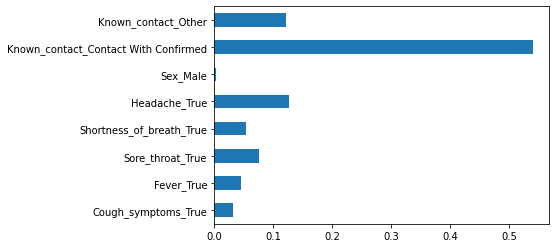

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [93]:
# Selecting 3 features based on results from feature selection methods. 
X_train = X_train[['Sore_throat_True', "Headache_True", "Known_contact_Contact With Confirmed", "Known_contact_Other"]] 
X_test = X_test[['Sore_throat_True', "Headache_True", "Known_contact_Contact With Confirmed", "Known_contact_Other"]] 

## Machine Learning

#### 1) Support Vector Machine

In [94]:
# Import svc
from sklearn.svm import SVC

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = { 'kernel' : ['rbf'],  
              'C' : [0.005, 0.01],
              'gamma' : [0.1, 1]
              } 
  
grid_1 = GridSearchCV(SVC(), param_grid, scoring='f1', 
                    refit = True, verbose = 3)
                                      #By default stratifiedKfold(5 folds is used.) 
  
# fitting the model for grid search
grid_1.fit(X_train, y_train)

# To print best score
print('The best score for f1 was found to be',grid_1.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....C=0.005, gamma=0.1, kernel=rbf;, score=0.623 total time=  33.1s
[CV 2/5] END ....C=0.005, gamma=0.1, kernel=rbf;, score=0.561 total time=  30.9s
[CV 3/5] END ....C=0.005, gamma=0.1, kernel=rbf;, score=0.631 total time=  32.2s
[CV 4/5] END ....C=0.005, gamma=0.1, kernel=rbf;, score=0.634 total time=  31.2s
[CV 5/5] END ....C=0.005, gamma=0.1, kernel=rbf;, score=0.644 total time=  31.9s
[CV 1/5] END ......C=0.005, gamma=1, kernel=rbf;, score=0.738 total time=  23.0s
[CV 2/5] END ......C=0.005, gamma=1, kernel=rbf;, score=0.682 total time=  20.8s
[CV 3/5] END ......C=0.005, gamma=1, kernel=rbf;, score=0.710 total time=  22.7s
[CV 4/5] END ......C=0.005, gamma=1, kernel=rbf;, score=0.715 total time=  23.2s
[CV 5/5] END ......C=0.005, gamma=1, kernel=rbf;, score=0.658 total time=  22.5s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.623 total time=  28.2s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;,

In [95]:
#print best parameter after tuning
print(grid_1.best_params_)

# print how our model looks after hyper-parameter tuning and it's score
print(grid_1.best_estimator_, 'The best f1 score found to be %.3f' % grid_1.best_score_)

# Make prediction on Training data
y_train_pred_svm = grid_1.predict(X_train)

# Checking predictions on the test set 
y_test_pred_svm = grid_1.predict(X_test)

{'C': 0.005, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.005, gamma=1) The best f1 score found to be 0.700


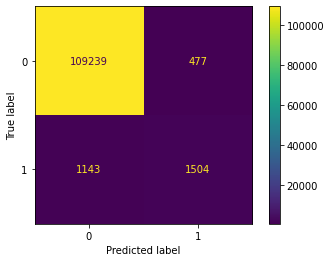

In [96]:
# Confusion matrix of test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred_svm, labels= grid_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= grid_1.classes_)
disp.plot()
plt.show()

In [97]:
# classification report on test set
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    109716
           1       0.76      0.57      0.65      2647

    accuracy                           0.99    112363
   macro avg       0.87      0.78      0.82    112363
weighted avg       0.98      0.99      0.98    112363



### 2) Random forest 

In [98]:
# Import RandomForest
from sklearn.ensemble import RandomForestClassifier

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'criterion': ['gini','entropy'], 
              'n_estimators': [40, 45],
              'max_depth': [3, 4],
              'bootstrap' : [True],
              'oob_score' : [True] } 
  
grid_2 = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1',
                    refit = True, verbose = 3)
  
# fitting the model for grid search
grid_2.fit(X_train, y_train)

# To print best score
print('The best score for f1 was found to be',grid_2.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=40, oob_score=True;, score=0.738 total time=   0.6s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=40, oob_score=True;, score=0.682 total time=   0.6s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=40, oob_score=True;, score=0.710 total time=   0.6s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=40, oob_score=True;, score=0.712 total time=   0.6s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=40, oob_score=True;, score=0.658 total time=   0.6s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=45, oob_score=True;, score=0.738 total time=   0.7s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=45, oob_score=True;, score=0.682 total time=   0.7s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=3, n_estimators=45, oob_

In [99]:
#print best parameter after tuning
print(grid_2.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_2.best_estimator_,'The best f1 score found to be %.3f' % grid_1.best_score_)


# Checking predictons on training set
y_train_pred_rf = grid_2.predict(X_train) 

# Checking predictions on the test set 
y_test_pred_rf = grid_2.predict(X_test)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40, 'oob_score': True}
RandomForestClassifier(max_depth=4, n_estimators=40, oob_score=True) The best f1 score found to be 0.700


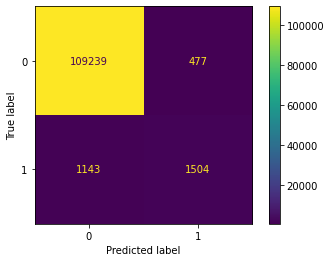

In [100]:
# Confusion matrix of test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred_rf, labels= grid_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= grid_1.classes_)
disp.plot()
plt.show()

In [101]:
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    109716
           1       0.76      0.57      0.65      2647

    accuracy                           0.99    112363
   macro avg       0.87      0.78      0.82    112363
weighted avg       0.98      0.99      0.98    112363



### 3) Logistic regression

In [102]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', None],
              'C' : [0.01, 0.5, 1]
               } 
  
grid_3 = GridSearchCV(LogisticRegression(), param_grid, scoring='f1',
                    refit = True, verbose = 3)
  
# fitting the model for grid search
grid_3.fit(X_train, y_train)

# To print best score
print('The best score for f1 was found to be',grid_3.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.677 total time=   0.2s
[CV 2/5] END ................C=0.01, penalty=l2;, score=0.605 total time=   0.2s
[CV 3/5] END ................C=0.01, penalty=l2;, score=0.644 total time=   0.2s
[CV 4/5] END ................C=0.01, penalty=l2;, score=0.643 total time=   0.2s
[CV 5/5] END ................C=0.01, penalty=l2;, score=0.646 total time=   0.2s
[CV 1/5] END ..........C=0.01, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.01, penalty=elasticne

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ..............C=0.01, penalty=None;, score=0.738 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END ..............C=0.01, penalty=None;, score=0.682 total time=   0.3s
[CV 3/5] END ..............C=0.01, penalty=None;, score=0.710 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END ..............C=0.01, penalty=None;, score=0.715 total time=   0.1s
[CV 5/5] END ..............C=0.01, penalty=None;, score=0.658 total time=   0.2s
[CV 1/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...................C=0.5, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .................C=0.5, penalty=l2;, score=0.738 total time=   0.2s
[CV 2/5] END .................C=0.5, penalty=l2;, score=0.682 total time=   0.1s
[CV 3/5] END .................C=0.5, penalty=l2;, score=0.710 total time=   0.1s
[CV 4/5] END .................C=0.5, penalty=l2;, score=0.715 total time=   0.1s
[CV 5/5] END .................C=0.5, penalty=l2;, score=0.658 total time=   0.1s
[CV 1/5] END ...........C=0.5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ...........C=0.5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END ...........C=0.5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END ...........C=0.5, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END ...........C=0.5, penalty=elasticnet;, score=nan total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END ...............C=0.5, penalty=None;, score=0.738 total time=   0.1s
[CV 2/5] END ...............C=0.5, penalty=None;, score=0.682 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END ...............C=0.5, penalty=None;, score=0.710 total time=   0.2s
[CV 4/5] END ...............C=0.5, penalty=None;, score=0.715 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END ...............C=0.5, penalty=None;, score=0.658 total time=   0.1s
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.738 total time=   0.1s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.682 total time=   0.1s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.710 total time=   0.1s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.715 total time=   0.1s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.658 total time=   0.1s
[CV 1/5] END .............C=1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .............C=

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

In [103]:
#print best parameter after tuning
print(grid_3.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_3.best_estimator_,'The best f1 score found to be %.3f' % grid_1.best_score_)

# Checking predictons on training set
y_train_pred_lg = grid_3.predict(X_train) 

# Checking predictions on the test set 
y_test_pred_lg = grid_3.predict(X_test)

{'C': 0.01, 'penalty': None}
LogisticRegression(C=0.01, penalty=None) The best f1 score found to be 0.700


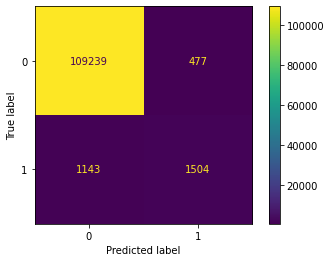

In [104]:
# Confusion matrix of test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred_lg, labels= grid_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= grid_1.classes_)
disp.plot()
plt.show()

In [105]:
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred_lg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    109716
           1       0.76      0.57      0.65      2647

    accuracy                           0.99    112363
   macro avg       0.87      0.78      0.82    112363
weighted avg       0.98      0.99      0.98    112363



### 4) KNN

In [106]:
# Import knn
from sklearn.neighbors import KNeighborsClassifier

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'n_neighbors' : [7, 9, 11],
              'weights' : ['uniform']
              } 
  
grid_4 = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1',
                    refit = True, verbose = 3)
  
# fitting the model for grid search
grid_4.fit(X_train, y_train)

# To print best score
print('The best score for f1 was found to be',grid_4.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....n_neighbors=7, weights=uniform;, score=0.148 total time=  11.6s
[CV 2/5] END ....n_neighbors=7, weights=uniform;, score=0.682 total time=  11.9s
[CV 3/5] END ....n_neighbors=7, weights=uniform;, score=0.710 total time=  12.2s
[CV 4/5] END ....n_neighbors=7, weights=uniform;, score=0.456 total time=  12.1s
[CV 5/5] END ....n_neighbors=7, weights=uniform;, score=0.658 total time=  10.9s
[CV 1/5] END ....n_neighbors=9, weights=uniform;, score=0.148 total time=  10.9s
[CV 2/5] END ....n_neighbors=9, weights=uniform;, score=0.682 total time=  12.2s
[CV 3/5] END ....n_neighbors=9, weights=uniform;, score=0.710 total time=  12.3s
[CV 4/5] END ....n_neighbors=9, weights=uniform;, score=0.715 total time=  12.2s
[CV 5/5] END ....n_neighbors=9, weights=uniform;, score=0.658 total time=  11.6s
[CV 1/5] END ...n_neighbors=11, weights=uniform;, score=0.148 total time=  11.5s
[CV 2/5] END ...n_neighbors=11, weights=uniform;,

In [107]:
#print best parameter after tuning
print(grid_4.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_4.best_estimator_,'The best f1 score found to be %.3f' % grid_1.best_score_)

# Checking predictons on training set
y_train_pred_knn = grid_4.predict(X_train) 

# Checking predictions on the test set 
y_test_pred_knn = grid_4.predict(X_test)

{'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=9) The best f1 score found to be 0.700


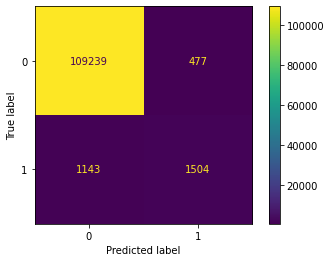

In [108]:
# Confusion matrix of test set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred_knn, labels= grid_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= grid_1.classes_)
disp.plot()
plt.show()

In [109]:
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    109716
           1       0.76      0.57      0.65      2647

    accuracy                           0.99    112363
   macro avg       0.87      0.78      0.82    112363
weighted avg       0.98      0.99      0.98    112363



### Comparision of results:


In [111]:
## 1
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision, Recall, F1score values for Covid Positive class (SVM) are :%.4f, %.4f, %.4f' %
      ( precision_score(y_test, y_test_pred_svm), recall_score(y_test, y_test_pred_svm),
       f1_score(y_test, y_test_pred_svm) )
      )

from sklearn.metrics import balanced_accuracy_score
x1 = balanced_accuracy_score(y_test, y_test_pred_svm)*100
print('The balanced accuracy score is %.2f' % (x1) )

## 2
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision, Recall, F1score values for Covid Positive class (Random Forest) are :%.4f, %.4f, %.4f' %
      ( precision_score(y_test, y_test_pred_rf), recall_score(y_test, y_test_pred_rf),
       f1_score(y_test, y_test_pred_rf) )
      )

from sklearn.metrics import balanced_accuracy_score
x2 = balanced_accuracy_score(y_test, y_test_pred_rf)*100
print('The balanced accuracy score is %.2f' % (x2) )

## 3
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision, Recall, F1score values for Covid Positive class (Logistic Regression) are :%.4f, %.4f, %.4f' %
      ( precision_score(y_test, y_test_pred_lg), recall_score(y_test, y_test_pred_lg),
       f1_score(y_test, y_test_pred_lg) )
      )

from sklearn.metrics import balanced_accuracy_score
x3 = balanced_accuracy_score(y_test, y_test_pred_lg)*100
print('The balanced accuracy score is %.2f' % (x3) )

## 4
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision, Recall, F1score values for Covid Positive class (KNN) are :%.4f, %.4f, %.4f' %
      ( precision_score(y_test, y_test_pred_knn), recall_score(y_test, y_test_pred_knn),
       f1_score(y_test, y_test_pred_knn) )
      )

from sklearn.metrics import balanced_accuracy_score
x4 = balanced_accuracy_score(y_test, y_test_pred_knn)*100
print('The balanced accuracy score is %.2f' % (x4) )

Precision, Recall, F1score values for Covid Positive class (SVM) are :0.7592, 0.5682, 0.6500
The balanced accuracy score is 78.19
Precision, Recall, F1score values for Covid Positive class (Random Forest) are :0.7592, 0.5682, 0.6500
The balanced accuracy score is 78.19
Precision, Recall, F1score values for Covid Positive class (Logistic Regression) are :0.7592, 0.5682, 0.6500
The balanced accuracy score is 78.19
Precision, Recall, F1score values for Covid Positive class (KNN) are :0.7592, 0.5682, 0.6500
The balanced accuracy score is 78.19


* As the input features which were used for training and testing are **4 categorical features with 2 categories for each,** the results are found to be same after testing with the test dataset for all the techniques.   

* Despite of training the algorithms with fine tuning of hyperparameters, the precision, recall and balanced accuracy score values are found to be same for diffierent machine learning techniques.

* **This situation is caused by the presence of asymptomatic covid cases in the data set.**

## Conclusion:
* The dataset is an imbalanced dataset with few targets as Covid Positive. Exploratory data analysis was performed to find the insights from the data and based on the results of two feature selection methods, 4 features were used to train the machine learning techniques.

* Machine learning techniques like SVM, Randomforest, Logistic regression and Knn were used. These were trained and tested with the data and the results obtained after testing were compared above.

* The models were trained using symptoms as variables but **asymptomatic covid cases are also possible.**

* One can choose anyone technique from the four used here, which resulted in predicting **50% of the covid positive cases with an accuray of 75.9% based on symptoms**. 
